## The Happy House 

### Problem Statement:
Predicting your emotion happy or not.



In this,
1. We are going to build 2 types of Architecture of Neural Network among those one is Lenet-5 
2. Comparing Various Optimizers
3. Variously trained models(Different epochs and batch size)

Dataset is pictures from the front door camera to check if the person is happy or not.  The dataset is labbeled.

**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

Dataset available in <a href="https://www.kaggle.com/iarunava/happy-house-dataset">Kaggle</a>

It is now time to solve the "Happy" Challenge.

## 1 - Importing Libraries and Data 

In [1]:
import numpy as np
import h5py

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
def load_dataset():
    train_data = h5py.File('../input/train_happy.h5', "r")
    X_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File('../input/test_happy.h5', "r")
    X_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


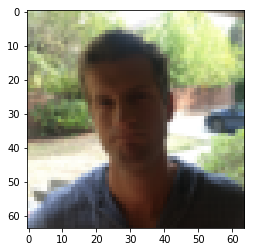

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

## 2 - Building a model 

This architecture is given in Deep learning specialization|

In [5]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3,3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7,7), strides=(1,1), name='Conv2D')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2,2), name='max_pool')(X)
    
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    model = Model(inputs = X_input, outputs=X, name='HappyModel')
        
    return model

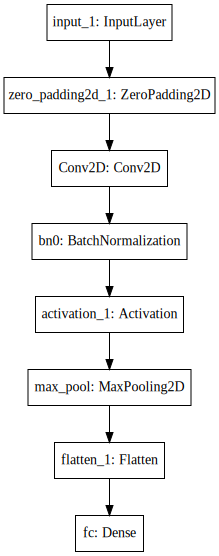

In [6]:
# Model flow chart
happyModel = HappyModel(X_train[0].shape)
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

Instructions for updating:
Colocations handled automatically by placer.


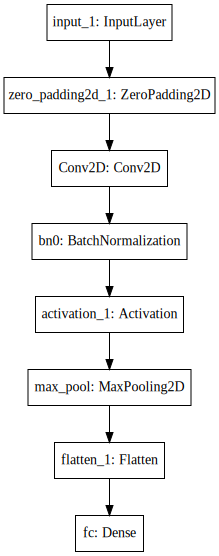

In [6]:
# Model flow chart
happyModel = HappyModel(X_train[0].shape)
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

In [7]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
Conv2D (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

## 3 - Predicting using various Optimizers

### 3.1 - SGD (Stochastic gradient descent optimizer)

About SGD  <a href="https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1">here</a>

In [8]:
happyModel_sgd = HappyModel(X_train.shape[1:])
happyModel_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy"])

In [9]:
history_sgd = happyModel_sgd.fit(X_train,Y_train, epochs=5,batch_size=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
600/600 [==============================] - 7s 11ms/step - loss: 7.6104 - acc: 0.4867
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 8.0590 - acc: 0.5000
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 8.0590 - acc: 0.5000
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 8.0590 - acc: 0.5000
Epoch 5/5
600/600 [==============================] - 7s 11ms/step - loss: 8.0590 - acc: 0.5000


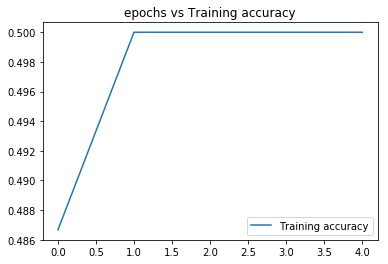

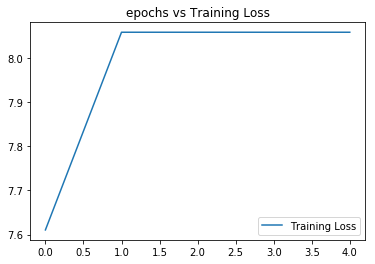

In [10]:
train_accuracy = history_sgd.history['acc']
train_loss = history_sgd.history['loss']

iterations = range(len(train_accuracy))
plt.plot(iterations, train_accuracy, label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(iterations, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [11]:
preds = happyModel_sgd.evaluate(x=X_test, y=Y_test)

print ("\nLoss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 4ms/step

Loss = 9.026133677164713
Test Accuracy = 0.4400000015894572


### 3.2 - RMSprop Optimizer

About RMSprop Optimizer  <a href="https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b">here</a>

In [12]:
happyModel_rms = HappyModel(X_train.shape[1:])
happyModel_rms.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=["accuracy"])

In [13]:
history_rms = happyModel_rms.fit(X_train,Y_train, epochs=5,batch_size=30)

Epoch 1/5
600/600 [==============================] - 7s 12ms/step - loss: 7.6765 - acc: 0.4833
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 7.9712 - acc: 0.5000
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 7.9712 - acc: 0.5000
Epoch 4/5
600/600 [==============================] - 6s 11ms/step - loss: 7.9712 - acc: 0.5000
Epoch 5/5
600/600 [==============================] - 7s 11ms/step - loss: 7.9712 - acc: 0.5000


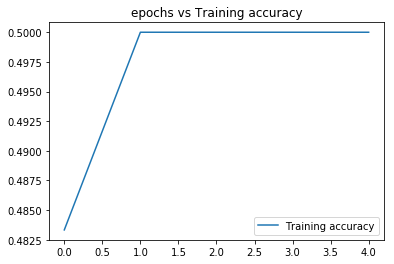

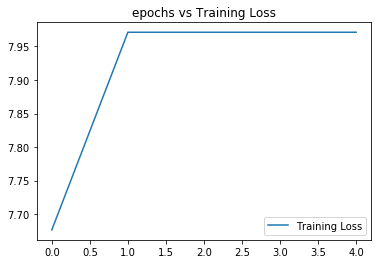

In [14]:
train_accuracy = history_rms.history['acc']
train_loss = history_rms.history['loss']

iterations = range(len(train_accuracy))
plt.plot(iterations, train_accuracy, label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(iterations, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [15]:
preds = happyModel_rms.evaluate(x=X_test, y=Y_test)

print ("\nLoss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 7.014649543762207
Test Accuracy = 0.5599999984105428


### 3.3 - Adam

Adam optimizer is a combination of RMSprop and Momentum optimizers. More about Adam Optimizer  <a href="https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/">here</a>

In [16]:
happyModel_adam = HappyModel(X_train[0].shape)
happyModel_adam.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [17]:
history_adam = happyModel_adam.fit(X_train,Y_train, epochs=5,batch_size=30)

Epoch 1/5
600/600 [==============================] - 7s 12ms/step - loss: 1.7721 - acc: 0.6000
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.4078 - acc: 0.8383
Epoch 3/5
600/600 [==============================] - 6s 11ms/step - loss: 0.2105 - acc: 0.9267
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.1199 - acc: 0.9517
Epoch 5/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0947 - acc: 0.9717


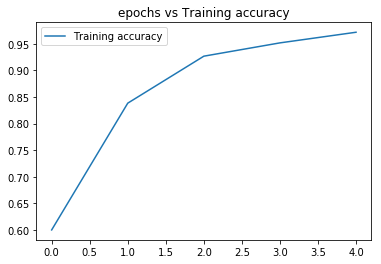

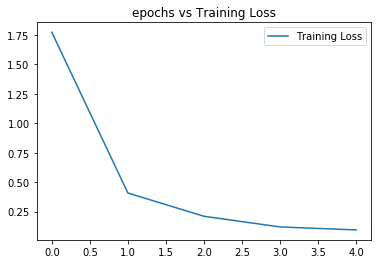

In [18]:
train_accuracy = history_adam.history['acc']
train_loss = history_adam.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [19]:
preds = happyModel_adam.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.15846624533335368
Test Accuracy = 0.940000003973643


### Conclusion
<ul> <li> Adam Optimizer got high accuracy i.e., 94%</li> </ul>

# 4 - Predicting with different epochs trained models

### 4.1 - Epoch : 20

In [20]:
happyModelE = HappyModel(X_train.shape[1:])
happyModelE.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [21]:
THistoryE = happyModelE.fit(X_train,Y_train, epochs=20,batch_size=30)

Epoch 1/20
600/600 [==============================] - 7s 12ms/step - loss: 1.8495 - acc: 0.5667
Epoch 2/20
600/600 [==============================] - 7s 11ms/step - loss: 0.4074 - acc: 0.8417
Epoch 3/20
600/600 [==============================] - 7s 11ms/step - loss: 0.2791 - acc: 0.8900
Epoch 4/20
600/600 [==============================] - 7s 11ms/step - loss: 0.1443 - acc: 0.9517
Epoch 5/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0969 - acc: 0.9750
Epoch 6/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0806 - acc: 0.9733
Epoch 7/20
600/600 [==============================] - 7s 12ms/step - loss: 0.1001 - acc: 0.9617
Epoch 8/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0786 - acc: 0.9783
Epoch 9/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0627 - acc: 0.9800
Epoch 10/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0439 - acc: 0.9900
Epoch 11/20
600/600 [==================

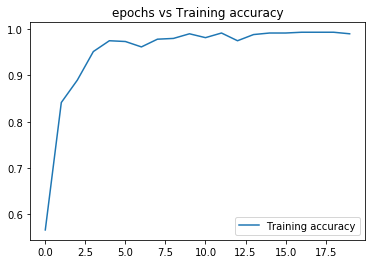

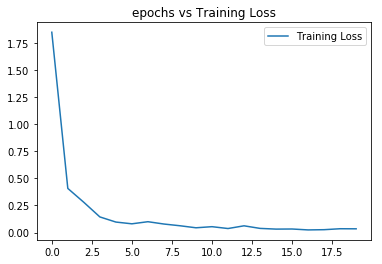

In [22]:
train_accuracy = THistoryE.history['acc']
train_loss = THistoryE.history['loss']

iterations = range(len(train_accuracy))
plt.plot(iterations, train_accuracy, label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(iterations, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [23]:
preds = happyModelE.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.12877306958039603
Test Accuracy = 0.940000003973643


In [24]:
y_pred = happyModelE.predict(X_test)

In [25]:
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[57  9]
 [ 0 84]]


### Observation
Got 94% accuracy!

### 4.2 - Epoch : 30

In [27]:
happyModel3 = HappyModel(X_train.shape[1:])
happyModel3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [28]:
# THistory (Train History)
THistory3 = happyModel3.fit(X_train,Y_train, epochs=30,batch_size=30)

Epoch 1/30
600/600 [==============================] - 8s 13ms/step - loss: 1.4135 - acc: 0.6550
Epoch 2/30
600/600 [==============================] - 7s 12ms/step - loss: 0.3546 - acc: 0.8600
Epoch 3/30
600/600 [==============================] - 7s 11ms/step - loss: 0.1591 - acc: 0.9400
Epoch 4/30
600/600 [==============================] - 7s 11ms/step - loss: 0.1181 - acc: 0.9567
Epoch 5/30
600/600 [==============================] - 7s 11ms/step - loss: 0.1006 - acc: 0.9650
Epoch 6/30
600/600 [==============================] - 7s 11ms/step - loss: 0.0899 - acc: 0.9650
Epoch 7/30
600/600 [==============================] - 7s 11ms/step - loss: 0.0906 - acc: 0.9733
Epoch 8/30
600/600 [==============================] - 7s 11ms/step - loss: 0.0674 - acc: 0.9833
Epoch 9/30
600/600 [==============================] - 7s 11ms/step - loss: 0.0481 - acc: 0.9883
Epoch 10/30
600/600 [==============================] - 7s 11ms/step - loss: 0.0548 - acc: 0.9867
Epoch 11/30
600/600 [==================

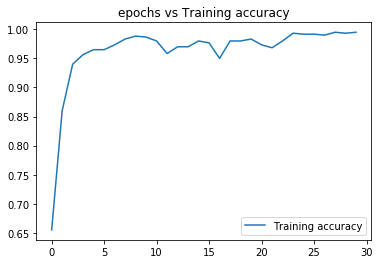

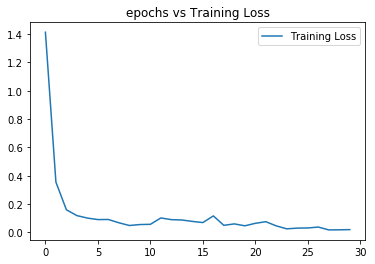

In [29]:
train_accuracy = THistory3.history['acc']
train_loss = THistory3.history['loss']

iterations = range(len(train_accuracy))
plt.plot(iterations, train_accuracy, label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(iterations, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [30]:
preds = happyModel3.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.08391090393066407
Test Accuracy = 0.9799999976158142


### Observation
<ul> <li>Model accuracy increased updo 97.9%</li> </ul>

### 4.3 - Epoch 40, Batch size : 16 (Coursera suggested model parameters)

In [31]:
happyModel2 = HappyModel(X_train[0].shape)
happyModel2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [32]:
THistory2 = happyModel2.fit(X_train,Y_train, epochs=40,batch_size=16)

Epoch 1/40
600/600 [==============================] - 7s 12ms/step - loss: 1.7778 - acc: 0.6700
Epoch 2/40
600/600 [==============================] - 7s 11ms/step - loss: 0.3198 - acc: 0.8783
Epoch 3/40
600/600 [==============================] - 7s 12ms/step - loss: 0.2290 - acc: 0.9083
Epoch 4/40
600/600 [==============================] - 6s 11ms/step - loss: 0.1836 - acc: 0.9383
Epoch 5/40
600/600 [==============================] - 7s 11ms/step - loss: 0.1964 - acc: 0.9300
Epoch 6/40
600/600 [==============================] - 7s 11ms/step - loss: 0.1669 - acc: 0.9317
Epoch 7/40
600/600 [==============================] - 6s 11ms/step - loss: 0.1263 - acc: 0.9500
Epoch 8/40
600/600 [==============================] - 7s 11ms/step - loss: 0.0851 - acc: 0.9717
Epoch 9/40
600/600 [==============================] - 7s 11ms/step - loss: 0.1109 - acc: 0.9650
Epoch 10/40
600/600 [==============================] - 7s 11ms/step - loss: 0.0659 - acc: 0.9700
Epoch 11/40
600/600 [==================

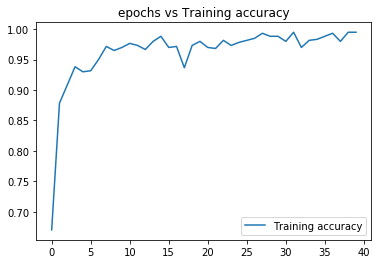

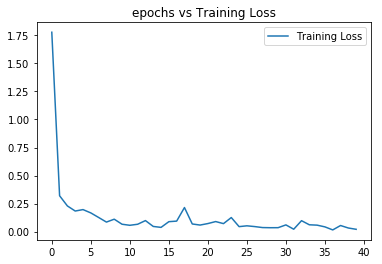

In [33]:
train_accuracy = THistory2.history['acc']
train_loss = THistory2.history['loss']

iterations = range(len(train_accuracy))
plt.plot(iterations, train_accuracy, label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(iterations, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [34]:
preds2 = happyModel2.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds2[0]))
print ("Test Accuracy = " + str(preds2[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.07384455939133962
Test Accuracy = 0.9600000039736429


## 5 - Predicting using LeNet-5

LeNet-5 is proposed by Yann LeCun(received Turing award). It is base ConvNet for modern neural network (CNN).
More about LeNet5 <a href="https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4">here</a> and 
<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf">paper</a>

In [35]:
# Building LeNet-5 
def create_model():
    model = Sequential()
    model.add(layers.Conv2D(filters=1, kernel_size=(1,1), strides=(2,2), name='Conv2D', input_shape=(64,64,3))) # For converting image to 32,32,1
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())

    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(units=120, activation='relu'))

    model.add(layers.Dense(units=84, activation='relu'))

    model.add(layers.Dense(units=1, activation = 'sigmoid'))
    
    return model

In [36]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D (Conv2D)              (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
__________

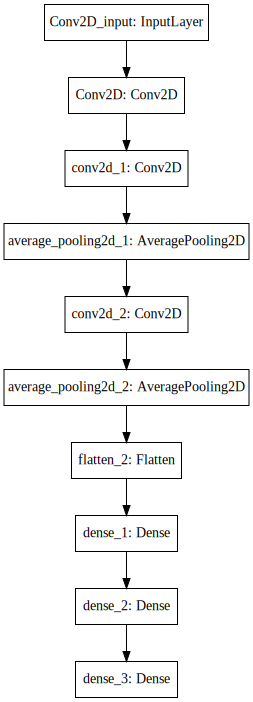

In [9]:
plot_model(model, to_file='HappyModel.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

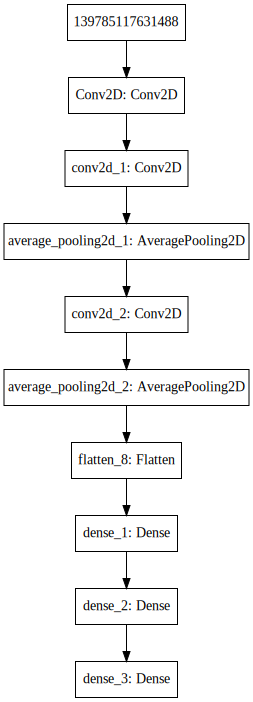

In [37]:
plot_model(model, to_file='HappyModel.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.6806 - acc: 0.5683
Epoch 2/20
600/600 [==============================] - 0s 693us/step - loss: 0.6385 - acc: 0.6233
Epoch 3/20
600/600 [==============================] - 0s 688us/step - loss: 0.5721 - acc: 0.6950
Epoch 4/20
600/600 [==============================] - 0s 692us/step - loss: 0.4751 - acc: 0.7700
Epoch 5/20
600/600 [==============================] - 0s 698us/step - loss: 0.3945 - acc: 0.8117
Epoch 6/20
600/600 [==============================] - 0s 679us/step - loss: 0.2972 - acc: 0.8800
Epoch 7/20
600/600 [==============================] - 0s 682us/step - loss: 0.2894 - acc: 0.8883
Epoch 8/20
600/600 [==============================] - 0s 722us/step - loss: 0.2821 - acc: 0.8850
Epoch 9/20
600/600 [==============================] - 0s 697us/step - loss: 0.2208 - acc: 0.9117
Epoch 10/20
600/600 [==============================] - 0s 690us/step - loss: 0.2056 - acc: 0.9200
Epoch 11/20
600/600 [==========

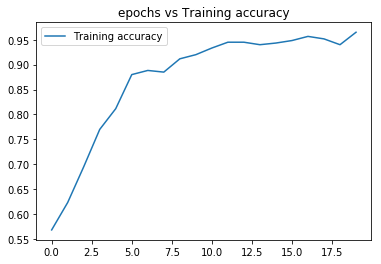

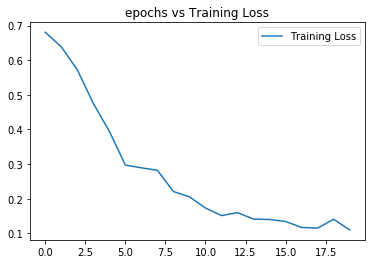

In [41]:
lenet5 = create_model()
lenet5.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
history = lenet5.fit(X_train,Y_train, epochs=20,batch_size=32)

train_accuracy = history.history['acc']
train_loss = history.history['loss']

iterations = range(len(train_accuracy))
plt.plot(iterations, train_accuracy, label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(iterations, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [42]:
preds = lenet5.evaluate(x=X_test, y=Y_test)

print ("\nLoss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


150/150 [==============================] - 0s 3ms/step

Loss = 0.15136117815971376
Test Accuracy = 0.9466666706403096


## 6 - Test with your own image

Change path to predict your pic is happy or not

path = 'https://www.cifar.ca/images/default-source/bios/lmb_yannlacun.png'

img = image.load_img(path, target_size=(64, 64))
imshow(img)

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

print(lenet2.predict(img))

## Conclusion

<ul>
<li>LeNet 5 : 94.6% accuracy</li>
<li>Coursera model :  97.9% accuracy with batch size 30 and epoch 20 where coursera suggested model got 96% accuracy</li>
<li>Compared SGD, RMSprop and Adam Optimizers. Among those Adam got hight accuracy</li>
</ul>
*Note :* Accuracy is not same everytime 